In [435]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
import os
from functools import reduce
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [260]:
dfs = {}
for file in os.listdir("player_data"):
    dfs[file[:-4]] = pd.read_csv("player_data/"+file)

In [384]:
tournament_dfs_2021 = []
for df in ["tournament_shooting", "tournament_passing", "tournament_defense", "tournament_goalkeeping"]:
    tournament_dfs_2021.append(dfs[df][dfs[df].Year==2021])
    
merged_df = reduce(lambda left,right: pd.merge(left, right, 
                                                how='outer', 
                                                on=["Player","Nation","Age","Pos","Born","League","Year"]), 
                   tournament_dfs_2021)

In [262]:
leagues_dfs_2021 = []
for df in ["league_shooting", "league_passing", "league_defense", "league_goalkeeping"]:
    leagues_dfs_2021.append(dfs[df][dfs[df].Year==2021])

leagues_merged_df = reduce(lambda left,right: pd.merge(left, right, 
                                                how='outer', 
                                                on=["Player","Nation","Age","Pos","Born","League","Year"]), 
                   leagues_dfs_2021)

# leagues_merged_df = leagues_merged_df.drop("Nation", axis=1)

In [263]:
# merged_df = merged_df[["Player","Nation"]]

In [34]:
# league_tourn_merged = pd.merge(left=merged_df, right=leagues_merged_df, on="Player", how="left")

In [35]:
# Use League data
# merged_df = league_tourn_merged

In [264]:
df = merged_df.groupby("Nation").mean()
df["Number Players"] = merged_df.groupby("Nation")["Player"].count()
df = df.dropna(how="all",axis=1)
df["TOP10"] = df.index.isin(dfs["tournament_results"]["2021"][:10].dropna()).astype("int")
df = df.drop("Dosqaly") # No GK
df = df.drop(["Year","Penalty Kicks Save%"], axis=1)

In [265]:
# useful_cols = ["Age", "Gls", "Standard Sh/90", "Standard SoT/90", "Standard G/SoT",
#               "Performance PK", "Performance GA90", "Performance Save%", "Pressures %", 
#                "W", "Performance CS%", "Total Cmp%",
#               "Penalty Kicks PKA", "TOP10"]
# df = df[useful_cols]

In [266]:
# sns.pairplot(df, hue="TOP10")

In [267]:
mapping = {}
for i, country in enumerate(dfs["tournament_results"]["2021"].dropna()):
    mapping[country] =  i+1
df.loc[:,"Score"] = df.index.map(mapping)
df.loc[:,"Score"] = df.loc[:,"Score"].fillna(0)

In [268]:
df

,Age,Born,90s_x,Gls,Standard Sh,Standard SoT,Standard SoT%,Standard Sh/90,Standard SoT/90,Standard G/Sh,...,L,Performance CS,Performance CS%,Performance PKatt_y,Penalty Kicks PKA,Penalty Kicks PKsv,Penalty Kicks PKm,Number Players,TOP10,Score
Nation,,,,,,,,,,,,,,,,,,,,,
Bernepamar,25.952381,1994.047619,2.776667,0.298571,1.092857,0.516190,36.777500,1.226667,0.571905,1.441667e-01,...,0.530,0.080,0.020,0.13,0.08,0.100,-0.030,21,1,8
Byasier Pujan,26.727273,1993.409091,2.086667,0.104286,1.053810,0.251905,28.472143,1.034286,0.244762,6.428571e-02,...,0.270,0.580,50.000,-0.04,0.09,0.050,-0.080,22,0,15
Djipines,24.944444,1995.166667,2.435000,0.043889,0.690000,0.180556,24.854167,0.704444,0.170556,8.583333e-02,...,0.550,0.300,25.070,0.07,0.07,-0.060,0.010,18,0,16
Eastern Niasland,26.857143,1993.190476,1.594762,0.021905,1.351905,0.166667,23.220000,1.266667,0.146190,1.000000e-01,...,0.990,-0.050,-0.080,0.41,-0.10,0.360,0.030,21,0,23
Eastern Sleboube,27.100000,1993.000000,1.637500,0.051000,0.580000,0.098500,27.222222,0.583000,0.099500,3.111111e-02,...,0.805,0.230,25.045,-0.09,0.00,-0.030,0.035,20,0,19
Esia,26.789474,1993.421053,2.301579,0.103158,1.135789,0.318947,35.269286,1.111579,0.310526,4.571429e-02,...,0.540,0.040,-0.040,-0.09,-0.04,0.060,0.050,19,0,14
Galamily,26.714286,1993.428571,2.587143,0.091905,1.230000,0.347619,22.672500,1.268095,0.340952,2.937500e-02,...,0.500,0.300,40.040,-0.04,0.04,0.030,0.010,21,1,7
Giumle Lizeibon,27.136364,1992.909091,2.175455,0.141364,1.825909,0.963182,30.498000,2.025909,1.146364,6.666667e-02,...,0.550,0.270,24.930,0.31,0.16,0.010,-0.040,22,1,10
Greri Landmoslands,27.368421,1992.631579,2.244211,0.085263,1.592105,0.433684,43.400833,1.591579,0.485789,7.083333e-02,...,0.480,0.290,24.930,0.21,0.22,0.060,0.010,19,0,11


In [269]:
cond_filter = df.isna().sum() == 0
df = df.loc[:,cond_filter]

In [270]:
df

,Age,Born,90s_x,Gls,Standard Sh,Standard SoT,Standard SoT%,Standard Sh/90,Standard SoT/90,Standard G/Sh,...,L,Performance CS,Performance CS%,Performance PKatt_y,Penalty Kicks PKA,Penalty Kicks PKsv,Penalty Kicks PKm,Number Players,TOP10,Score
Nation,,,,,,,,,,,,,,,,,,,,,
Bernepamar,25.952381,1994.047619,2.776667,0.298571,1.092857,0.516190,36.777500,1.226667,0.571905,1.441667e-01,...,0.530,0.080,0.020,0.13,0.08,0.100,-0.030,21,1,8
Byasier Pujan,26.727273,1993.409091,2.086667,0.104286,1.053810,0.251905,28.472143,1.034286,0.244762,6.428571e-02,...,0.270,0.580,50.000,-0.04,0.09,0.050,-0.080,22,0,15
Djipines,24.944444,1995.166667,2.435000,0.043889,0.690000,0.180556,24.854167,0.704444,0.170556,8.583333e-02,...,0.550,0.300,25.070,0.07,0.07,-0.060,0.010,18,0,16
Eastern Niasland,26.857143,1993.190476,1.594762,0.021905,1.351905,0.166667,23.220000,1.266667,0.146190,1.000000e-01,...,0.990,-0.050,-0.080,0.41,-0.10,0.360,0.030,21,0,23
Eastern Sleboube,27.100000,1993.000000,1.637500,0.051000,0.580000,0.098500,27.222222,0.583000,0.099500,3.111111e-02,...,0.805,0.230,25.045,-0.09,0.00,-0.030,0.035,20,0,19
Esia,26.789474,1993.421053,2.301579,0.103158,1.135789,0.318947,35.269286,1.111579,0.310526,4.571429e-02,...,0.540,0.040,-0.040,-0.09,-0.04,0.060,0.050,19,0,14
Galamily,26.714286,1993.428571,2.587143,0.091905,1.230000,0.347619,22.672500,1.268095,0.340952,2.937500e-02,...,0.500,0.300,40.040,-0.04,0.04,0.030,0.010,21,1,7
Giumle Lizeibon,27.136364,1992.909091,2.175455,0.141364,1.825909,0.963182,30.498000,2.025909,1.146364,6.666667e-02,...,0.550,0.270,24.930,0.31,0.16,0.010,-0.040,22,1,10
Greri Landmoslands,27.368421,1992.631579,2.244211,0.085263,1.592105,0.433684,43.400833,1.591579,0.485789,7.083333e-02,...,0.480,0.290,24.930,0.21,0.22,0.060,0.010,19,0,11


In [271]:
# LogReg
y = df.TOP10.values
X = df.drop(["TOP10","Score"],axis=1)

logreg = LogisticRegression(max_iter=1000, penalty="l1", solver='liblinear')
logreg.fit(X.values,y)

display(pd.DataFrame({"Nation":df.index, "Score":df.Score, "Prediction":logreg.predict(X)}))

logreg_coefs = pd.DataFrame({"Stat":X.columns, "Coef":logreg.coef_[0]})
display(logreg_coefs[logreg_coefs.Coef != 0])

,Nation,Score,Prediction
Nation,,,
Bernepamar,Bernepamar,8,1
Byasier Pujan,Byasier Pujan,15,0
Djipines,Djipines,16,0
Eastern Niasland,Eastern Niasland,23,0
Eastern Sleboube,Eastern Sleboube,19,0
Esia,Esia,14,0
Galamily,Galamily,7,1
Giumle Lizeibon,Giumle Lizeibon,10,1
Greri Landmoslands,Greri Landmoslands,11,0


,Stat,Coef
1,Born,-0.052235
24,Total TotDist,-0.012942
25,Total PrgDist,0.110752
34,Long Cmp%,0.318370
69,Playing Time Min,0.118015
75,Performance Save%,0.371513


In [272]:
# Lasso regression
y = df.Score.values
X = df.drop(["TOP10","Score"],axis=1)
X = X.drop(["Playing Time Min","90s","90s_x","90s_y",
            "Playing Time 90s","W","L","Playing Time MP",
           "Playing Time Starts", "Performance PKatt_x"], axis=1)
# X = X[["Born","Standard SoT%","Total TotDist", "Total PrgDist","Short Cmp%"]]
X = X[["Gls","Standard FK","Total Cmp%","Medium Cmp%","Blocks Pass","Performance GA",
       "Penalty Kicks PKm","Penalty Kicks PKm"]]
X = (X-X.mean())/X.std()

lasso = Lasso(tol=0.01, alpha=1)
lasso.fit(X.values, y)

lasso_coefs = pd.DataFrame({"Stat":X.columns, "Coef":lasso.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.Coef != 0]
display(lasso_coefs)

print("R2 score", r2_score(y, lasso.predict(X)))
print("Cross Validation Scores", cross_val_score(lasso, X, y))
print("Mean Cross Validation Score", np.mean(cross_val_score(lasso, X, y)))

display(pd.DataFrame({"Score":df.Score, "Prediction":lasso.predict(X)}))



,Stat,Coef
0,Gls,-1.435584e+00
1,Standard FK,-9.250601e-01
2,Total Cmp%,-8.746235e-02
3,Medium Cmp%,-4.047183e-01
4,Blocks Pass,3.061693e-01
5,Performance GA,3.683531e+00
6,Penalty Kicks PKm,4.936185e-01
7,Penalty Kicks PKm,9.689219e-16


R2 score 0.8108638962366675
Cross Validation Scores [0.5582736  0.70296792 0.66002075 0.56450478 0.9117763 ]
Mean Cross Validation Score 0.6795086684120664


,Score,Prediction
Nation,,
Bernepamar,8,9.594306
Byasier Pujan,15,10.053262
Djipines,16,15.913205
Eastern Niasland,23,20.171063
Eastern Sleboube,19,19.215044
Esia,14,12.177759
Galamily,7,8.853006
Giumle Lizeibon,10,10.288218
Greri Landmoslands,11,12.812316


In [369]:
# Lasso regression
y = df.Score.values

X = df.drop(["TOP10","Score"],axis=1)
X = X.drop(["Playing Time Min","90s","90s_x","90s_y"], axis=1)
# X = X[["Total TotDist","Performance CS%","Standard SoT%"]]
# X = X.drop(["Born","Standard SoT%","Total TotDist", "Total PrgDist","Short Cmp%"],axis=1)
# X = X[["Born","Standard SoT%","Total TotDist", "Total PrgDist", "Short Cmp%","90s"]]
Y = X
X = (X-X.mean())/X.std()
X = X[["Gls","Standard FK","Total Cmp%","Medium Cmp%","Blocks Pass","Performance GA",
       "Penalty Kicks PKm"]]
# X = X.drop("Number Players", axis=1)

lasso = LassoCV(cv=3, tol=0.1)
lasso.fit(X.values, y)

lasso_coefs = pd.DataFrame({"Stat":X.columns, "Coef":lasso.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.Coef != 0]
display(lasso_coefs)

y_pred = lasso.predict(X)

print(r2_score(y, y_pred))
print(np.mean(cross_val_score(lasso, X, y)))

display(pd.DataFrame({"Score":df.Score, "Prediction":lasso.predict(X)}))



,Stat,Coef
0,Gls,-1.606882
1,Standard FK,-0.948223
2,Total Cmp%,-0.397181
3,Medium Cmp%,-0.896960
4,Blocks Pass,0.909493
5,Performance GA,4.089069
6,Penalty Kicks PKm,0.933866


0.8686162614153354
0.7788877250022239


,Score,Prediction
Nation,,
Bernepamar,8,8.251070
Byasier Pujan,15,8.919039
Djipines,16,17.000062
Eastern Niasland,23,21.919632
Eastern Sleboube,19,20.295710
Esia,14,11.572838
Galamily,7,8.432117
Giumle Lizeibon,10,10.198040
Greri Landmoslands,11,11.555928


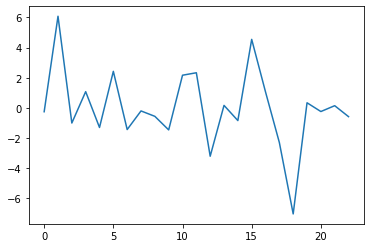

In [425]:
plt.plot(y - y_pred)

In [426]:
# np.mean(abs(y-y_pred))
np.var(y-y_pred)

6.496168367524549

In [427]:
np.std(y-y_pred)

2.548758201070582

In [274]:
contributions_df = X[lasso_coefs.Stat.values]
for stat in contributions_df.columns:
    contributions_df[stat] *= lasso_coefs.loc[lasso_coefs.Stat == stat,"Coef"].values
print("Intercept is {}".format(lasso.intercept_))
display(contributions_df)
display(contributions_df.var())

Intercept is 12.652173913043473


,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm
Nation,,,,,,,
Bernepamar,-4.585122,-0.496384,-0.394654,-1.036835,-0.029355,2.566929,-0.425684
Byasier Pujan,-0.183277,0.591883,-0.008756,0.132088,-0.829774,-2.619545,-0.815753
Djipines,1.185107,1.361100,0.058592,-0.120066,1.426818,0.549967,-0.113629
Eastern Niasland,1.683191,-0.391491,-0.069817,0.037137,1.422814,6.543225,0.042399
Eastern Sleboube,1.023993,-0.145647,0.376373,0.245497,-0.164360,6.226274,0.081406
Esia,-0.157725,-1.149206,-0.510880,-1.043028,0.283953,1.299124,0.198426
Galamily,0.097232,0.146087,0.429727,0.276089,-0.649567,-4.405997,-0.113629
Giumle Lizeibon,-1.023335,0.649097,-0.339027,-0.656804,1.635786,-2.216153,-0.503698
Greri Landmoslands,0.247708,-0.526058,-0.445167,-1.161921,-0.569185,1.472006,-0.113629


Gls                   2.582070
Standard FK           0.899127
Total Cmp%            0.157752
Medium Cmp%           0.804538
Blocks Pass           0.827178
Performance GA       16.720482
Penalty Kicks PKm     0.872105
dtype: float64

In [275]:
# useful_cols = ["Born", "Total TotDist", "Total PrgDist", "Medium Cmp%", "Long Cmp%",
#               "Pressures Press", "Playing Time Min", "Performance SoTA", "Performance Save%", "TOP10"]
useful_cols = list(contributions_df.columns) + ["TOP10"]
Test = df[useful_cols]

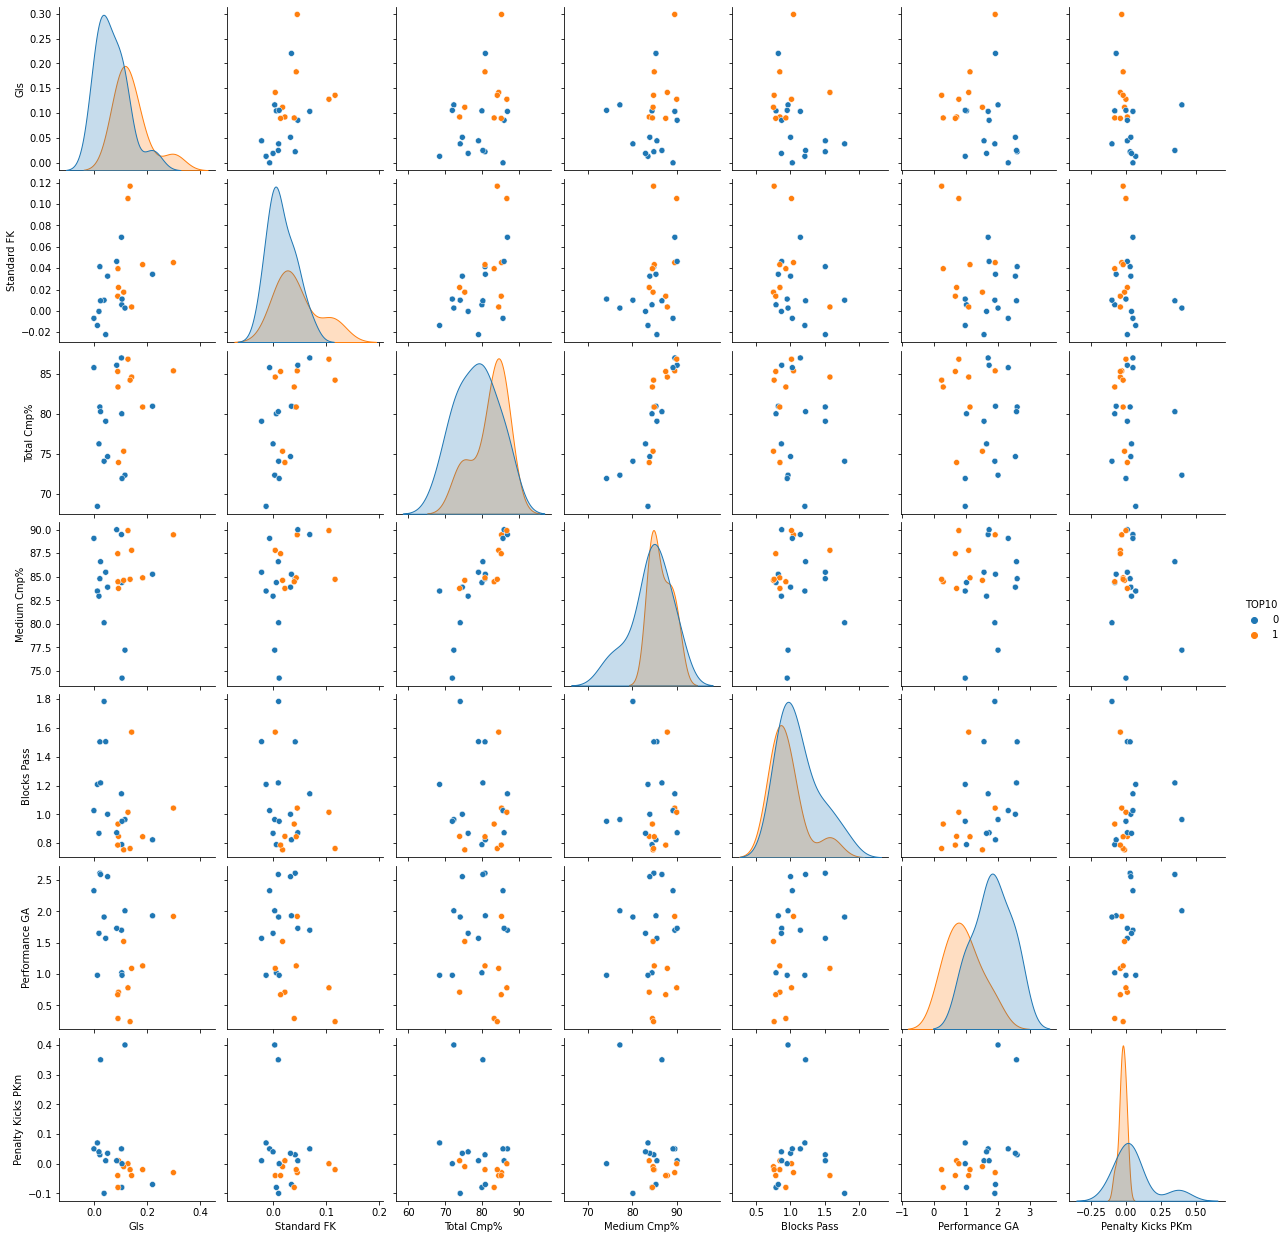

In [276]:
sns.pairplot(Test, hue="TOP10")

In [350]:
rarita["Player"]

0      H. Tourgeman
1         M. Ludwig
2      E. Nakanjako
3        H. Mubaiwa
4            E. Koç
           ...     
168        H. Amade
169      H. Mirembe
170        Y. Acola
171        Y. Draru
172       W. Nasiru
Name: Player, Length: 173, dtype: object

In [353]:
rarita

,Player,Pos,1/3,90s,A-xA,Age,Ast,Blocks Blocks,Blocks Pass,Blocks Sh,...,Total PrgDist,Total TotDist,Vs Dribbles Att,Vs Dribbles Past,Vs Dribbles Tkl,Vs Dribbles Tkl%,W,Year,xA,Value
0,H. Tourgeman,MFFW,-0.405518,-0.609547,0.022125,0.231471,-0.284255,1.070342,1.459323,-0.620752,...,-0.466709,-0.509406,0.385442,0.526248,-0.420673,-0.780674,NaN,NaN,-0.390782,-3.024274
1,M. Ludwig,DFMF,-0.477353,1.386093,-0.076422,1.227602,-0.351675,0.346984,0.023462,0.642900,...,-0.482412,-0.545518,0.594336,0.005009,1.475841,0.887800,NaN,NaN,-0.572416,1.372657
2,E. Nakanjako,MFFW,-0.463772,0.251861,0.137095,-1.163112,-0.174698,-0.328149,-0.022121,-0.775485,...,-0.501488,-0.541997,-0.443394,-0.340036,-0.203364,0.479901,NaN,NaN,-0.299964,-1.890153
3,H. Mubaiwa,FW,-0.549189,-1.162351,-0.207817,1.227602,-0.360103,-1.340849,-1.241464,-0.698119,...,-0.513126,-0.549453,-1.009428,-0.839250,-0.835535,NaN,NaN,NaN,-0.561064,1.426557
4,E. Koç,DF,-0.490577,0.050597,-0.027149,0.430697,-0.309538,1.504356,1.812591,0.256068,...,-0.430759,-0.515640,0.594336,0.386761,0.547339,-0.024418,NaN,NaN,-0.379430,3.266117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,H. Amade,MFFW,-0.423387,-0.764296,-0.224241,-1.163112,-0.469661,-0.125609,0.342542,-0.594963,...,-0.486663,-0.528094,0.567382,0.511565,0.231254,-0.251473,NaN,NaN,-0.458895,-1.663179
169,H. Mirembe,MFFW,-0.547044,-0.996868,0.531281,-1.362339,-0.006147,0.009418,-0.079100,0.591322,...,-0.521754,-0.577631,-0.719672,-0.523570,-1.151621,-1.468059,NaN,NaN,-0.504303,1.099757
170,Y. Acola,GK,NaN,NaN,NaN,1.426828,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.523721,NaN,NaN,0.978324
171,Y. Draru,GK,NaN,NaN,NaN,2.223733,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.391611,NaN,NaN,-0.692210


In [358]:
not_normalised = leagues_merged_df[leagues_merged_df["Nation"] == "Rarita"]
not_normalised = not_normalised.reset_index(drop=True)
not_normalised["Value"] = rarita["Value"]
not_normalised.to_csv("not_normalised.csv")

In [360]:
not_normalised

,Player,Nation,Pos,Squad_x,Age,Born,90s_x,Gls,Standard Sh,Standard SoT,...,D,L,Performance CS,Performance CS%,Performance PKatt_y,Penalty Kicks PKA,Penalty Kicks PKsv,Penalty Kicks PKm,Penalty Kicks Save%,Value
0,H. Tourgeman,Rarita,MFFW,Fanatical Outlaws,27,1993,6.22,0.26,1.91,0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.024274
1,M. Ludwig,Rarita,DFMF,Great Galactic Gorgons,32,1988,28.56,0.01,0.36,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372657
2,E. Nakanjako,Rarita,MFFW,Mighty Jays,20,2000,16.03,0.14,0.74,0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.890153
3,H. Mubaiwa,Rarita,FW,Solemn Cougars,32,1988,0.27,0.06,5.07,-0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426557
4,E. Koç,Rarita,DF,Stacked Rocks,28,1992,13.88,0.08,0.18,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.266117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,H. Amade,Rarita,MFFW,Wild Hornets,20,2000,4.69,0.25,1.94,0.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.663179
169,H. Mirembe,Rarita,MFFW,Wild Hornets,19,2001,2.18,0.09,1.83,-0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.099757
170,Y. Acola,Rarita,GK,NaN,33,1987,NaN,NaN,NaN,NaN,...,0.34,0.23,0.16,18.80,0.08,0.13,-0.05,0.07,19.92,0.978324
171,Y. Draru,Rarita,GK,NaN,37,1983,NaN,NaN,NaN,NaN,...,0.31,0.27,0.29,34.92,0.30,0.27,-0.03,0.08,20.01,-0.692210


In [329]:
rarita = leagues_merged_df[leagues_merged_df.Nation == "Rarita"]
# rarita = leagues_merged_df[leagues_merged_df.League == "RFL"]

rarita = rarita.drop(["Squad_x","Squad_y","League"],axis=1)
rarita

,Player,Nation,Pos,Age,Born,90s_x,Gls,Standard Sh,Standard SoT,Standard SoT%,...,W,D,L,Performance CS,Performance CS%,Performance PKatt_y,Penalty Kicks PKA,Penalty Kicks PKsv,Penalty Kicks PKm,Penalty Kicks Save%
23,H. Tourgeman,Rarita,MFFW,27,1993,6.22,0.26,1.91,0.53,24.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,M. Ludwig,Rarita,DFMF,32,1988,28.56,0.01,0.36,0.06,10.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,E. Nakanjako,Rarita,MFFW,20,2000,16.03,0.14,0.74,0.23,30.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,H. Mubaiwa,Rarita,FW,32,1988,0.27,0.06,5.07,-0.06,-0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,E. Koç,Rarita,DF,28,1992,13.88,0.08,0.18,0.16,33.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,H. Amade,Rarita,MFFW,20,2000,4.69,0.25,1.94,0.64,33.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3017,H. Mirembe,Rarita,MFFW,19,2001,2.18,0.09,1.83,-0.04,-0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3018,Y. Acola,Rarita,GK,33,1987,NaN,NaN,NaN,NaN,NaN,...,0.51,0.34,0.23,0.16,18.80,0.08,0.13,-0.05,0.07,19.92
3019,Y. Draru,Rarita,GK,37,1983,NaN,NaN,NaN,NaN,NaN,...,0.47,0.31,0.27,0.29,34.92,0.30,0.27,-0.03,0.08,20.01


In [330]:
rarita = rarita.set_index(["Player","Pos"])

In [331]:
Y = Y[lasso_coefs.Stat.values]

In [332]:
standard_rarita = (rarita - rarita.mean())/rarita.std()

# standard_rarita = rarita[lasso_coefs.Stat.values]
standard_rarita = (standard_rarita - standard_rarita.mean()) / standard_rarita.std()
standard_rarita

,,1/3,90s,90s_x,90s_y,A-xA,Age,Ast,Blocks Blocks,Blocks Pass,Blocks Sh,...,Total Cmp%,Total PrgDist,Total TotDist,Vs Dribbles Att,Vs Dribbles Past,Vs Dribbles Tkl,Vs Dribbles Tkl%,W,Year,xA
Player,Pos,,,,,,,,,,,,,,,,,,,,,
H. Tourgeman,MFFW,-0.405518,-0.609547,-0.619892,-0.615964,0.022125,0.231471,-0.284255,1.070342,1.459323,-0.620752,...,1.068104,-0.466709,-0.509406,0.385442,0.526248,-0.420673,-0.780674,NaN,NaN,-0.390782
M. Ludwig,DFMF,-0.477353,1.386093,1.378076,1.374600,-0.076422,1.227602,-0.351675,0.346984,0.023462,0.642900,...,0.390836,-0.482412,-0.545518,0.594336,0.005009,1.475841,0.887800,NaN,NaN,-0.572416
E. Nakanjako,MFFW,-0.463772,0.251861,0.257461,0.263962,0.137095,-1.163112,-0.174698,-0.328149,-0.022121,-0.775485,...,0.964746,-0.501488,-0.541997,-0.443394,-0.340036,-0.203364,0.479901,NaN,NaN,-0.299964
H. Mubaiwa,FW,-0.549189,-1.162351,-1.152027,-1.163235,-0.207817,1.227602,-0.360103,-1.340849,-1.241464,-0.698119,...,-0.396137,-0.513126,-0.549453,-1.009428,-0.839250,-0.835535,NaN,NaN,NaN,-0.561064
E. Koç,DF,-0.490577,0.050597,0.065177,0.066336,-0.027149,0.430697,-0.309538,1.504356,1.812591,0.256068,...,0.324650,-0.430759,-0.515640,0.594336,0.386761,0.547339,-0.024418,NaN,NaN,-0.379430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H. Amade,MFFW,-0.423387,-0.764296,-0.756727,-0.772455,-0.224241,-1.163112,-0.469661,-0.125609,0.342542,-0.594963,...,0.340063,-0.486663,-0.528094,0.567382,0.511565,0.231254,-0.251473,NaN,NaN,-0.458895
H. Mirembe,MFFW,-0.547044,-0.996868,-0.981207,-0.995119,0.531281,-1.362339,-0.006147,0.009418,-0.079100,0.591322,...,-0.612827,-0.521754,-0.577631,-0.719672,-0.523570,-1.151621,-1.468059,NaN,NaN,-0.504303
Y. Acola,GK,NaN,NaN,NaN,NaN,NaN,1.426828,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523721,NaN,NaN


In [334]:
rarita = standard_rarita.reset_index()
rarita

,Player,Pos,1/3,90s,90s_x,90s_y,A-xA,Age,Ast,Blocks Blocks,...,Total Cmp%,Total PrgDist,Total TotDist,Vs Dribbles Att,Vs Dribbles Past,Vs Dribbles Tkl,Vs Dribbles Tkl%,W,Year,xA
0,H. Tourgeman,MFFW,-0.405518,-0.609547,-0.619892,-0.615964,0.022125,0.231471,-0.284255,1.070342,...,1.068104,-0.466709,-0.509406,0.385442,0.526248,-0.420673,-0.780674,NaN,NaN,-0.390782
1,M. Ludwig,DFMF,-0.477353,1.386093,1.378076,1.374600,-0.076422,1.227602,-0.351675,0.346984,...,0.390836,-0.482412,-0.545518,0.594336,0.005009,1.475841,0.887800,NaN,NaN,-0.572416
2,E. Nakanjako,MFFW,-0.463772,0.251861,0.257461,0.263962,0.137095,-1.163112,-0.174698,-0.328149,...,0.964746,-0.501488,-0.541997,-0.443394,-0.340036,-0.203364,0.479901,NaN,NaN,-0.299964
3,H. Mubaiwa,FW,-0.549189,-1.162351,-1.152027,-1.163235,-0.207817,1.227602,-0.360103,-1.340849,...,-0.396137,-0.513126,-0.549453,-1.009428,-0.839250,-0.835535,NaN,NaN,NaN,-0.561064
4,E. Koç,DF,-0.490577,0.050597,0.065177,0.066336,-0.027149,0.430697,-0.309538,1.504356,...,0.324650,-0.430759,-0.515640,0.594336,0.386761,0.547339,-0.024418,NaN,NaN,-0.379430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,H. Amade,MFFW,-0.423387,-0.764296,-0.756727,-0.772455,-0.224241,-1.163112,-0.469661,-0.125609,...,0.340063,-0.486663,-0.528094,0.567382,0.511565,0.231254,-0.251473,NaN,NaN,-0.458895
169,H. Mirembe,MFFW,-0.547044,-0.996868,-0.981207,-0.995119,0.531281,-1.362339,-0.006147,0.009418,...,-0.612827,-0.521754,-0.577631,-0.719672,-0.523570,-1.151621,-1.468059,NaN,NaN,-0.504303
170,Y. Acola,GK,NaN,NaN,NaN,NaN,NaN,1.426828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523721,NaN,NaN
171,Y. Draru,GK,NaN,NaN,NaN,NaN,NaN,2.223733,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391611,NaN,NaN


In [335]:
df_ = rarita.loc[rarita.Pos.isin(["DF","DFMF","MFDF"])]
mf = rarita.loc[rarita.Pos.isin(["MF","MFFW","FWMF","MFDF","DFMF"])]
fw = rarita.loc[rarita.Pos.isin(["FW","MFFW","FWMF"])]
gk = rarita.loc[rarita.Pos.isin(["GK"])]

In [336]:
for stat, val in lasso_coefs.values:
    print(stat,val)

Gls -1.6068821243639813
Standard FK -0.9482233198338254
Total Cmp% -0.3971806653665649
Medium Cmp% -0.8969603214277939
Blocks Pass 0.909493299541201
Performance GA 4.089068639826528
Penalty Kicks PKm 0.9338657427762009


In [337]:
lasso.intercept_

12.652173913043473

In [347]:
rarita.sort_values("Value").reset_index(drop=True).to_csv("normalised_data.csv")

In [344]:
rarita = rarita.drop(["90s_x","90s_y","Performance PKatt_x"], axis=1)

In [468]:
rarita["Value"] = rarita.fillna(0).apply(lambda row: sum(
    [row[stat] * coef for stat, coef in lasso_coefs.values]) , axis=1)

res = rarita.sort_values("Value", ascending=True)[
    ["Player","Pos"]+list(lasso_coefs.Stat.values)+["Value"]]
res = res.reset_index(drop=True)
res.head(25)

,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
0,K. Kazlo?,FW,4.832101,3.937875,-0.578374,-0.882552,-0.945175,NaN,NaN,-11.336899
1,B. Ampofo,GK,-0.118982,0.540325,0.321024,1.613995,-1.150298,-1.147161,-0.909313,-8.482538
2,A. Omar,GK,-0.903910,-0.551745,0.913974,1.610083,-1.252860,-1.573163,-0.909313,-8.252954
3,M. Asiimwe,GK,-0.602015,-0.066381,0.185933,1.606172,-1.230068,-1.253662,-0.739575,-7.419922
4,J. Namirembe,MF,2.115043,2.117759,-0.915648,-0.898199,-0.375389,NaN,NaN,-4.578821
5,H. Mubaiwa,FW,2.598076,0.054960,-0.253793,-0.867884,-1.013549,NaN,NaN,-4.269473
6,P. Rabiu,MFFW,0.847083,4.059216,-0.465949,-0.853216,0.194398,NaN,NaN,-4.083036
7,U. Shoko,FW,2.718834,-0.551745,-0.018970,-0.073839,-0.136078,NaN,NaN,-3.895665
8,D. Lehner,MFFW,2.477317,0.661666,-0.633680,-0.877663,-0.250036,NaN,NaN,-3.796656
9,G. Jankowski,MF,2.537697,-0.309063,0.062628,-0.191186,0.114628,NaN,NaN,-3.533854


In [469]:
res[res.Pos == "GK"]

,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
1,B. Ampofo,GK,-0.118982,0.540325,0.321024,1.613995,-1.150298,-1.147161,-0.909313,-8.482538
2,A. Omar,GK,-0.903910,-0.551745,0.913974,1.610083,-1.252860,-1.573163,-0.909313,-8.252954
3,M. Asiimwe,GK,-0.602015,-0.066381,0.185933,1.606172,-1.230068,-1.253662,-0.739575,-7.419922
21,W. Nasiru,GK,NaN,NaN,NaN,NaN,NaN,-0.742460,0.618333,-2.458530
24,F. Akumu,GK,-0.058603,-1.401133,0.349130,1.486869,-1.161694,-0.146058,-0.400098,-2.077006
44,W. Nasiru,GK,-0.058603,-0.794427,-0.501309,1.422329,-1.321234,NaN,NaN,-1.430853
54,F. Ithungu,GK,-0.843531,-0.430404,-2.395303,1.041930,-1.173090,-0.593359,0.618333,-1.135393
57,Y. Acola,GK,-1.024668,0.054960,0.371796,1.467312,-1.309838,NaN,NaN,-1.060673
64,Y. Draru,GK,NaN,NaN,NaN,NaN,NaN,-0.465559,1.297287,-0.692210
76,U. Nyeko,GK,0.001776,-0.066381,-0.224780,1.388103,-1.309838,0.514245,-0.060621,-0.240823


In [361]:
display(res.loc[res.Pos.isin(["DF","DFMF","MFDF"])].head(10))
display(res.loc[res.Pos.isin(["MF","MFFW","FWMF","MFDF","DFMF"])].head(10))
display(res.loc[res.Pos.isin(["FW","MFFW","FWMF"])].head(10))
display(res.loc[res.Pos.isin(["GK"])].head(10))

,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
18,T. Larsson,DF,-0.118982,0.661666,1.418978,1.180790,-0.500742,NaN,NaN,-2.514351
25,E. Bahrami,DF,-0.843531,0.297643,1.476097,1.606172,-1.218673,NaN,NaN,-2.062101
28,T. Nouri,DF,0.303671,0.054960,1.224955,1.133852,0.034858,NaN,NaN,-2.011924
30,W. Guo,DF,0.122534,1.147030,0.452488,0.480623,-0.010725,NaN,NaN,-1.905112
34,C. Baluka,DF,0.484808,0.297643,0.777976,0.636107,0.183002,NaN,NaN,-1.774382
36,I. Takeuchi,DF,-0.662394,0.418984,-0.282806,1.604216,-1.138902,NaN,NaN,-1.695318
37,H. Azizi,DF,0.665946,-0.915768,0.767096,0.761277,-0.546325,NaN,NaN,-1.686132
42,B. Lai,DF,-0.602015,0.904348,1.069011,0.694780,-0.637490,NaN,NaN,-1.517731
43,C. Tukamushaba,DF,-0.179361,-0.187722,1.220422,1.047798,-0.534929,NaN,NaN,-1.444860
45,R. Taketa,DF,-0.360499,0.418984,1.049065,0.958810,-0.352597,NaN,NaN,-1.415379


,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
4,J. Namirembe,MF,2.115043,2.117759,-0.915648,-0.898199,-0.375389,NaN,NaN,-4.578821
6,P. Rabiu,MFFW,0.847083,4.059216,-0.465949,-0.853216,0.194398,NaN,NaN,-4.083036
8,D. Lehner,MFFW,2.477317,0.661666,-0.633680,-0.877663,-0.250036,NaN,NaN,-3.796656
9,G. Jankowski,MF,2.537697,-0.309063,0.062628,-0.191186,0.114628,NaN,NaN,-3.533854
11,P. Villa,MFFW,1.632011,-0.309063,0.884961,0.451286,-0.238640,NaN,NaN,-3.302705
12,H. Tourgeman,MFFW,0.967841,1.753736,1.068104,0.790613,1.459323,NaN,NaN,-3.024274
17,L. Mandala,MFFW,1.390494,-0.187722,-0.179448,0.018082,-0.626095,NaN,NaN,-2.570733
19,O. Wanjala,MF,1.148978,0.054960,1.074451,0.886446,0.684414,NaN,NaN,-2.497775
20,B. Ayuba,MF,2.839592,0.418984,-0.094222,-1.419413,1.288388,NaN,NaN,-2.477820
22,B. Katooko,MF,-0.541636,4.180558,-0.372564,-1.259039,-0.432367,NaN,NaN,-2.209709


,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
0,K. Kazlo?,FW,4.832101,3.937875,-0.578374,-0.882552,-0.945175,NaN,NaN,-11.336899
5,H. Mubaiwa,FW,2.598076,0.054960,-0.253793,-0.867884,-1.013549,NaN,NaN,-4.269473
6,P. Rabiu,MFFW,0.847083,4.059216,-0.465949,-0.853216,0.194398,NaN,NaN,-4.083036
7,U. Shoko,FW,2.718834,-0.551745,-0.018970,-0.073839,-0.136078,NaN,NaN,-3.895665
8,D. Lehner,MFFW,2.477317,0.661666,-0.633680,-0.877663,-0.250036,NaN,NaN,-3.796656
10,H. Makumbi,FW,2.175422,-0.673086,-0.062490,-0.201943,-0.956571,NaN,NaN,-3.521452
11,P. Villa,MFFW,1.632011,-0.309063,0.884961,0.451286,-0.238640,NaN,NaN,-3.302705
12,H. Tourgeman,MFFW,0.967841,1.753736,1.068104,0.790613,1.459323,NaN,NaN,-3.024274
13,L. Tarigan,FW,3.020729,-1.279792,-0.339925,-1.393010,-0.808426,NaN,NaN,-2.991200
14,A. Kyarikunda,FW,0.967841,1.025689,0.388116,0.118805,-0.022121,NaN,NaN,-2.808623


,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
1,B. Ampofo,GK,-0.118982,0.540325,0.321024,1.613995,-1.150298,-1.147161,-0.909313,-8.482538
2,A. Omar,GK,-0.903910,-0.551745,0.913974,1.610083,-1.252860,-1.573163,-0.909313,-8.252954
3,M. Asiimwe,GK,-0.602015,-0.066381,0.185933,1.606172,-1.230068,-1.253662,-0.739575,-7.419922
21,W. Nasiru,GK,NaN,NaN,NaN,NaN,NaN,-0.742460,0.618333,-2.458530
24,F. Akumu,GK,-0.058603,-1.401133,0.349130,1.486869,-1.161694,-0.146058,-0.400098,-2.077006
44,W. Nasiru,GK,-0.058603,-0.794427,-0.501309,1.422329,-1.321234,NaN,NaN,-1.430853
54,F. Ithungu,GK,-0.843531,-0.430404,-2.395303,1.041930,-1.173090,-0.593359,0.618333,-1.135393
57,Y. Acola,GK,-1.024668,0.054960,0.371796,1.467312,-1.309838,NaN,NaN,-1.060673
64,Y. Draru,GK,NaN,NaN,NaN,NaN,NaN,-0.465559,1.297287,-0.692210
76,U. Nyeko,GK,0.001776,-0.066381,-0.224780,1.388103,-1.309838,0.514245,-0.060621,-0.240823


In [508]:
# selected_indices = [0,1,4,5,9,11,16,18,22,24,25,28,29,31,33,34,39,42,46,70]
selected_indices = [0,1,4,5,9,11,16,18,22,3,25,28,29,31,33,34,39,42,46,70]
# selected_indices = [0,1,4,5,9,11,16,18,24,25,26,28,29,31,34,39,42,46,52]
players = res.iloc[selected_indices,0] 
players

0         K. Kazlo?
1         B. Ampofo
4      J. Namirembe
5        H. Mubaiwa
9      G. Jankowski
11         P. Villa
16     N. Yamashita
18       T. Larsson
22       B. Katooko
3        M. Asiimwe
25       E. Bahrami
28         T. Nouri
29      W. Dehghani
31     E. Nakanjako
33    K. Al-Zahrani
34        C. Baluka
39         H. Amade
42           B. Lai
46          H. Zare
70        V. Sultan
Name: Player, dtype: object

Rank determined based on Lasso Regression.
Error term in Lasso assumed to be normally distributed with mean zero and constant variance (independent of predictors).

Let $r$ denote the rank and $\hat{r}$ denote the predicted rank. Correcting for continuous vs discrete, the probability of ranking first is
$$\Pr[r\leq1.5]=\Pr\left[\frac{r-\hat{r}}{\sigma_r}\leq\frac{1.5-\hat{r}}{\sigma_r}\right]=\Phi\left(\frac{1.5-\hat{r}}{\sigma_r}\right)$$
where $\Phi$ is the CDF of a standard normal random variable.

The variance $\sigma^2$ is estimated from the data on $r-\hat{r}$.

The probability of top 10 is calculated similarly.
$$\Pr[r\leq10.5]$$

In [509]:
# Predicting rank
value = [res.iloc[selected_indices].mean()[stat] * coef for stat, coef in lasso_coefs.values]
rank = sum(value) + lasso.intercept_
print(rank)

4.1890246660050945


In [510]:
# Pr(rank <= 1.5) = Pr(Z <= (1.5-y_pred)/std)
z_rank_1 = (1.5 - rank) / np.std(y-y_pred)
z_rank_1

-1.0550332569310008

In [511]:
# Probability of rank 1 in 1 year.
norm.cdf(z_rank_1)

0.14570505745874235

In [512]:
z_rank_10 = (10.5 - rank) / np.std(y-y_pred)
z_rank_10

2.476098098024379

In [513]:
# Probability of top 10 in one year
norm.cdf(z_rank_10)

0.99335864616137

In [514]:
# Probabilty of first in 10 years
1-(1-norm.cdf(z_rank_1))**10

0.7929485132643551

In [496]:
res

,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
0,K. Kazlo?,FW,4.832101,3.937875,-0.578374,-0.882552,-0.945175,NaN,NaN,-11.336899
1,B. Ampofo,GK,-0.118982,0.540325,0.321024,1.613995,-1.150298,-1.147161,-0.909313,-8.482538
2,A. Omar,GK,-0.903910,-0.551745,0.913974,1.610083,-1.252860,-1.573163,-0.909313,-8.252954
3,M. Asiimwe,GK,-0.602015,-0.066381,0.185933,1.606172,-1.230068,-1.253662,-0.739575,-7.419922
4,J. Namirembe,MF,2.115043,2.117759,-0.915648,-0.898199,-0.375389,NaN,NaN,-4.578821
...,...,...,...,...,...,...,...,...,...,...
168,O. Balog,DFMF,-0.843531,-1.522474,-1.519478,-1.876086,-0.637490,NaN,NaN,4.505589
169,X. Tumushabe,GK,-0.058603,-1.037109,-3.063504,1.611061,-1.150298,0.940246,0.957810,4.542296
170,L. Jung,FWMF,-0.903910,-1.158451,-1.593823,-2.054062,-0.329806,NaN,NaN,4.726438
171,Z. Nyamahunge,GK,-0.300119,-1.401133,-0.559334,1.299115,-1.309838,1.600549,-1.588267,4.737982


In [497]:
res.iloc[selected_indices]

,Player,Pos,Gls,Standard FK,Total Cmp%,Medium Cmp%,Blocks Pass,Performance GA,Penalty Kicks PKm,Value
0,K. Kazlo?,FW,4.832101,3.937875,-0.578374,-0.882552,-0.945175,NaN,NaN,-11.336899
1,B. Ampofo,GK,-0.118982,0.540325,0.321024,1.613995,-1.150298,-1.147161,-0.909313,-8.482538
4,J. Namirembe,MF,2.115043,2.117759,-0.915648,-0.898199,-0.375389,NaN,NaN,-4.578821
5,H. Mubaiwa,FW,2.598076,0.054960,-0.253793,-0.867884,-1.013549,NaN,NaN,-4.269473
9,G. Jankowski,MF,2.537697,-0.309063,0.062628,-0.191186,0.114628,NaN,NaN,-3.533854
11,P. Villa,MFFW,1.632011,-0.309063,0.884961,0.451286,-0.238640,NaN,NaN,-3.302705
16,N. Yamashita,FW,3.322624,-0.187722,-0.846743,-2.499978,-0.193057,NaN,NaN,-2.757956
18,T. Larsson,DF,-0.118982,0.661666,1.418978,1.180790,-0.500742,NaN,NaN,-2.514351
22,B. Katooko,MF,-0.541636,4.180558,-0.372564,-1.259039,-0.432367,NaN,NaN,-2.209709
3,M. Asiimwe,GK,-0.602015,-0.066381,0.185933,1.606172,-1.230068,-1.253662,-0.739575,-7.419922


In [498]:
tournament_dfs_2020 = []
for df in ["tournament_shooting", "tournament_passing", "tournament_defense", "tournament_goalkeeping"]:
    tournament_dfs_2020.append(dfs[df][dfs[df].Year==2020])
    
merged_df_2020 = reduce(lambda left,right: pd.merge(left, right, 
                                                how='outer', 
                                                on=["Player","Nation","Age","Pos","Born","League","Year"]), 
                   tournament_dfs_2020)
merged_df_2020

,Player,Nation,Pos,Age,Born,90s_x,Gls,Standard Sh,Standard SoT,Standard SoT%,...,W,D,L,Performance CS,Performance CS%,Performance PKatt_y,Penalty Kicks PKA,Penalty Kicks PKsv,Penalty Kicks PKm,Penalty Kicks Save%
0,B. Schneider,Bernepamar,DF,26,1995,3.02,-0.06,-0.02,0.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G. Adilovi?,Bernepamar,DF,19,2002,2.92,-0.09,0.08,0.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J. Mizrahi,Bernepamar,DF,22,1999,1.95,0.04,0.55,0.02,-0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L. Ayugi,Bernepamar,DF,29,1992,1.96,0.02,0.02,-0.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N. Salleh,Bernepamar,DF,24,1997,2.26,-0.07,0.37,0.48,100.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,P. Uddin,Xikong,MF,30,1991,4.89,0.00,1.93,0.76,44.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523,S. Yamamoto,Xikong,MF,36,1985,2.70,-0.02,0.45,0.03,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,X. Aliru,Xikong,MF,22,1999,0.11,0.01,10.00,-0.01,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525,X. Arab,Xikong,MF,34,1987,0.51,0.09,-0.01,-0.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [499]:
df2 = merged_df_2020.groupby("Nation").mean()
df2["Number Players"] = merged_df_2020.groupby("Nation")["Player"].count()
df2 = df2.dropna(how="all",axis=1)
df2["TOP10"] = df2.index.isin(dfs["tournament_results"]["2021"][:10].dropna()).astype("int")
# df2 = df.drop("Dosqaly") # No GK
df2 = df2.drop(["Year","Penalty Kicks Save%"], axis=1)
df2

,Age,Born,90s_x,Gls,Standard Sh,Standard SoT,Standard SoT%,Standard Sh/90,Standard SoT/90,Standard G/Sh,...,D,L,Performance CS,Performance CS%,Performance PKatt_y,Penalty Kicks PKA,Penalty Kicks PKsv,Penalty Kicks PKm,Number Players,TOP10
Nation,,,,,,,,,,,,,,,,,,,,,
Bernepamar,27.192308,1993.692308,2.105385,0.066923,0.598462,0.219615,34.594667,0.610769,0.183846,0.086667,...,-4.000000e-02,0.660000,0.280000,24.935000,0.145000,0.210000,-0.005000,-0.050000,26,1
Bernoullist,27.476190,1993.523810,2.061429,0.002857,0.638095,0.168095,19.697500,0.584762,0.132381,0.013333,...,6.450000e-01,0.310000,0.625000,66.580000,0.000000,-0.025000,0.065000,-0.015000,21,0
Byasier Pujan,27.833333,1992.958333,2.776250,0.067500,1.724583,0.437917,28.817368,1.947083,0.435833,0.047895,...,2.500000e-01,0.135000,0.280000,25.000000,-0.070000,0.000000,0.030000,0.040000,24,0
Cabballi,25.535714,1995.357143,2.386071,0.024286,0.738571,0.170357,29.183333,0.747500,0.181429,-0.014167,...,1.300000e-01,0.675000,0.145000,16.670000,0.145000,0.040000,0.080000,0.255000,28,0
Cabral Retrea,28.612903,1992.258065,1.720323,0.241935,1.141935,0.489677,35.546190,1.149032,0.487419,0.107619,...,4.100000e-01,0.490000,0.040000,0.090000,0.010000,0.070000,-0.100000,0.050000,31,0
Cuandbo,29.533333,1991.400000,2.185000,0.133667,0.469000,0.318333,51.106667,0.455000,0.310000,0.139333,...,-2.000000e-02,1.010000,-0.003333,0.003333,0.576667,0.613333,0.013333,-0.016667,30,0
Dastatesne,27.384615,1993.423077,2.457692,0.228077,1.143462,0.438846,26.537500,1.163462,0.447692,0.080625,...,3.500000e-01,0.380000,0.090000,16.700000,0.110000,0.170000,-0.020000,0.060000,26,0
Deshslands Landdenhai,28.250000,1992.625000,2.044062,0.015625,0.643125,0.140313,29.656429,0.625625,0.161250,0.018571,...,2.366667e-01,0.723333,0.130000,11.086667,-0.046667,-0.006667,-0.006667,-0.046667,32,0
Djipines,25.750000,1995.071429,2.339643,0.094643,1.107143,0.353214,32.888824,1.085714,0.350357,0.138824,...,1.400000e-01,0.046667,3.806667,75.075000,-0.016667,0.043333,0.016667,-0.016667,28,0


In [500]:
lasso_coefs

,Stat,Coef
0,Gls,-1.606882
1,Standard FK,-0.948223
2,Total Cmp%,-0.397181
3,Medium Cmp%,-0.896960
4,Blocks Pass,0.909493
5,Performance GA,4.089069
6,Penalty Kicks PKm,0.933866


In [501]:
test = df2[["Gls","Performance GA","Penalty Kicks PKm"]]
test = (test - test.mean()) / test.std()
test["Value"] = lasso.intercept_ + test["Gls"] * -1.606882 + test["Performance GA"] * 4.089069 + test["Penalty Kicks PKm"] * 0.933866
sorted_df = test.sort_values("Value")

In [502]:
for i,country in enumerate(dfs["tournament_results"]["2020"]):
    sorted_df.loc[country,"Rank"] = i+1

In [503]:
sorted_df.dropna()

,Gls,Performance GA,Penalty Kicks PKm,Value,Rank
Nation,,,,,
Nganion,0.156871,-1.267535,-0.901059,6.375593,2.0
Sobianitedrucy,0.059907,-1.445587,0.837437,7.426858,3.0
Greri Landmoslands,1.398018,-0.679189,0.092367,7.714733,5.0
Southern Ristan,1.241445,-0.212124,0.050974,9.837532,4.0
Byasier Pujan,-0.396140,-0.679189,0.092367,10.597733,6.0
People's Land of Maneau,-0.062987,-0.655964,2.327576,12.244748,8.0
Nkasland Cronestan,-0.197206,-0.083101,-0.155989,12.483583,10.0
Mico,-0.243899,0.629108,-0.714792,14.949039,7.0
Esia,0.092884,0.706522,-0.362953,15.052990,9.0


In [504]:
league_stats = leagues_merged_df.groupby("League").mean()
standard_league = (league_stats - league_stats.mean()) / league_stats.std()

In [505]:
standard_league[["Standard SoT/90","Standard SoT%","Medium Cmp%","Pressures %","Blocks Pass","Performance GA90"]]

,Standard SoT/90,Standard SoT%,Medium Cmp%,Pressures %,Blocks Pass,Performance GA90
League,,,,,,
A,1.204254,1.731767,0.973231,-0.813712,0.318404,-1.184309
B,0.560981,-0.302532,0.335096,-0.367055,-1.358626,0.163458
C,0.448441,0.298385,-1.426231,1.477211,1.414361,1.048021
D,-0.630523,-1.277067,0.776450,-0.039744,0.205456,-0.324239
E,-1.623209,-0.435069,-1.066389,-1.124960,0.359109,-0.929215
RFL,0.040057,-0.015485,0.407843,0.868260,-0.938705,1.226284
